In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='alexander-prutko', api_key='VocBkhjfvvSy6zHJ8789')

In [4]:
from scipy.stats import multivariate_normal

In [5]:
# параметры распределений
mu0X, mu0Y, sigma0 = -1., -1., 1.
mu1X, mu1Y, sigma1 = 1., 1., 2.

In [6]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [7]:
d0 = torch.distributions.Normal(torch.tensor([mu0X, mu0Y]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1X, mu1Y]), torch.tensor([sigma1]))

In [8]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.4495,  0.6229]), tensor(-0.3977)]


In [9]:
net = nn.Sequential(nn.Linear(2, 10), nn.SELU(), nn.Linear(10, 10), nn.SELU(), nn.Linear(10, 1))
net_opt = optim.SGD(lr=1e-3, params=list(net.parameters()))

In [10]:
net.cuda()

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): SELU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): SELU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [11]:
log_freq = 1000
for i in range(500000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = F.sigmoid(net(x.cuda()))
            loss = F.binary_cross_entropy(out, y.cuda())
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    net_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = F.sigmoid(net(x.cuda()))
    loss = F.binary_cross_entropy(out, y.cuda())
    loss.backward()
    net_opt.step()

/media/alex/Data/alex/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



Ошибка после 0 итераций: 0.725125
Ошибка после 1 итераций: 0.421966
Ошибка после 2 итераций: 0.378032
Ошибка после 3 итераций: 0.366744
Ошибка после 4 итераций: 0.362971
Ошибка после 5 итераций: 0.360719
Ошибка после 6 итераций: 0.357028
Ошибка после 7 итераций: 0.355038
Ошибка после 8 итераций: 0.352735
Ошибка после 9 итераций: 0.349562
Ошибка после 10 итераций: 0.346789
Ошибка после 11 итераций: 0.343209
Ошибка после 12 итераций: 0.340207
Ошибка после 13 итераций: 0.339011
Ошибка после 14 итераций: 0.337217
Ошибка после 15 итераций: 0.335065
Ошибка после 16 итераций: 0.333799
Ошибка после 17 итераций: 0.329484
Ошибка после 18 итераций: 0.330535
Ошибка после 19 итераций: 0.328310
Ошибка после 20 итераций: 0.327821
Ошибка после 21 итераций: 0.327011
Ошибка после 22 итераций: 0.326057
Ошибка после 23 итераций: 0.324989
Ошибка после 24 итераций: 0.323003
Ошибка после 25 итераций: 0.322338
Ошибка после 26 итераций: 0.324450
Ошибка после 27 итераций: 0.322854
Ошибка после 28 итераций: 0.32

Ошибка после 231 итераций: 0.317572
Ошибка после 232 итераций: 0.315066
Ошибка после 233 итераций: 0.316041
Ошибка после 234 итераций: 0.314721
Ошибка после 235 итераций: 0.316622
Ошибка после 236 итераций: 0.315691
Ошибка после 237 итераций: 0.315788
Ошибка после 238 итераций: 0.315956
Ошибка после 239 итераций: 0.316588
Ошибка после 240 итераций: 0.317583
Ошибка после 241 итераций: 0.316234
Ошибка после 242 итераций: 0.317053
Ошибка после 243 итераций: 0.318417
Ошибка после 244 итераций: 0.315956
Ошибка после 245 итераций: 0.314429
Ошибка после 246 итераций: 0.313879
Ошибка после 247 итераций: 0.316053
Ошибка после 248 итераций: 0.317297
Ошибка после 249 итераций: 0.315934
Ошибка после 250 итераций: 0.318653
Ошибка после 251 итераций: 0.316408
Ошибка после 252 итераций: 0.317956
Ошибка после 253 итераций: 0.316125
Ошибка после 254 итераций: 0.316916
Ошибка после 255 итераций: 0.317299
Ошибка после 256 итераций: 0.317052
Ошибка после 257 итераций: 0.314408
Ошибка после 258 итераций: 0

Ошибка после 459 итераций: 0.318490
Ошибка после 460 итераций: 0.316004
Ошибка после 461 итераций: 0.317436
Ошибка после 462 итераций: 0.314818
Ошибка после 463 итераций: 0.313925
Ошибка после 464 итераций: 0.315235
Ошибка после 465 итераций: 0.314808
Ошибка после 466 итераций: 0.314293
Ошибка после 467 итераций: 0.314791
Ошибка после 468 итераций: 0.316582
Ошибка после 469 итераций: 0.316591
Ошибка после 470 итераций: 0.316118
Ошибка после 471 итераций: 0.314727
Ошибка после 472 итераций: 0.316419
Ошибка после 473 итераций: 0.314382
Ошибка после 474 итераций: 0.317069
Ошибка после 475 итераций: 0.317257
Ошибка после 476 итераций: 0.315536
Ошибка после 477 итераций: 0.316000
Ошибка после 478 итераций: 0.315378
Ошибка после 479 итераций: 0.315595
Ошибка после 480 итераций: 0.316872
Ошибка после 481 итераций: 0.315957
Ошибка после 482 итераций: 0.316727
Ошибка после 483 итераций: 0.317127
Ошибка после 484 итераций: 0.315004
Ошибка после 485 итераций: 0.316772
Ошибка после 486 итераций: 0

In [12]:
nx, ny = (300, 300)
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
xv, yv = np.meshgrid(x, y)
F0 = multivariate_normal([mu0X, mu0Y], sigma0)
F1 = multivariate_normal([mu1X, mu1Y], sigma1)

grid_list = list(zip(xv.reshape(1,-1).tolist()[0], yv.reshape(1,-1).tolist()[0]))
grid = np.reshape(grid_list, (nx,ny,2))
f0 = F0.pdf(grid)
f1 = F1.pdf(grid)
ratio = f1 / (f1 + f0)
tensor_grid = torch.tensor(grid, dtype=torch.float)
with torch.no_grad():
    dist = F.sigmoid(net(tensor_grid.cuda())).cpu().numpy()

/media/alex/Data/alex/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



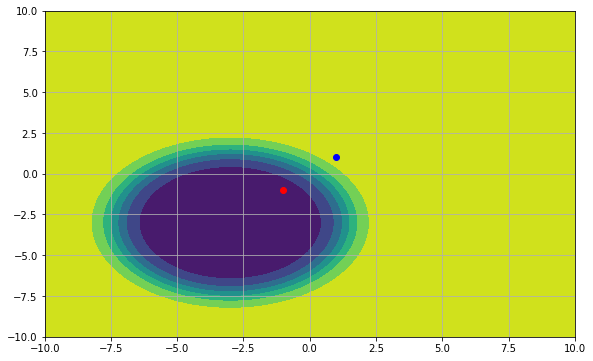

In [19]:
plt.contourf(x,y,ratio)
plt.scatter([-1],[-1], c='red')
plt.scatter([1],[1], c='blue')
plt.grid(True)

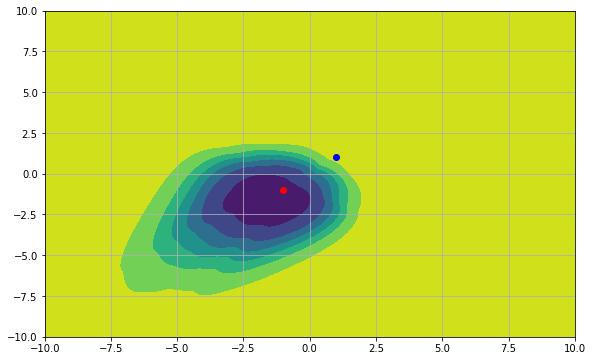

In [20]:
dist = dist.reshape((nx,ny))
h = plt.contourf(x,y,dist)
plt.scatter([-1],[-1], c='red')
plt.scatter([1],[1], c='blue')
plt.grid(True)

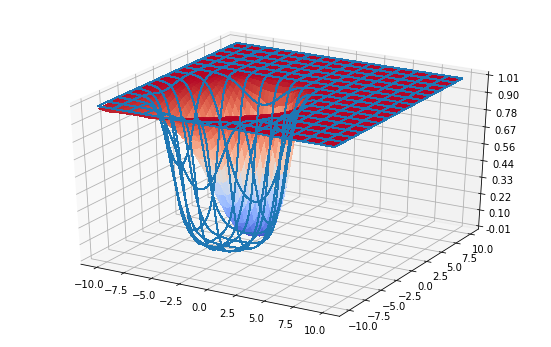

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(xv, yv, dist, cmap=cm.coolwarm, rstride=5, cstride=5,
                       linewidth=0, antialiased=False)
surf = ax.plot_wireframe(xv, yv, ratio, cmap=cm.coolwarm, rstride=20, cstride=20,
                       linewidth=1, antialiased=False)


ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

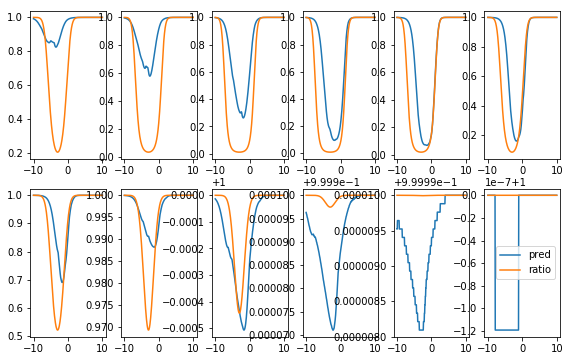

In [16]:
plt.rcParams['figure.figsize'] = [9.5, 6]
yy = 50
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.plot(x, dist[yy+20*i,:], label='pred')
    plt.plot(x, ratio[yy+20*i,:], label='ratio')
plt.legend();

In [17]:
data = [go.Surface(z=dist, x=xv, y=yv, opacity=1.00, colorscale='Greens'),
        go.Surface(z=ratio, x=xv, y=yv, opacity=0.8)]

In [18]:
py.iplot(data,filename='plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alexander-prutko/0 or inside your plot.ly account where it is named 'plot'


[plotly plot](https://plot.ly/~alexander-prutko/0)